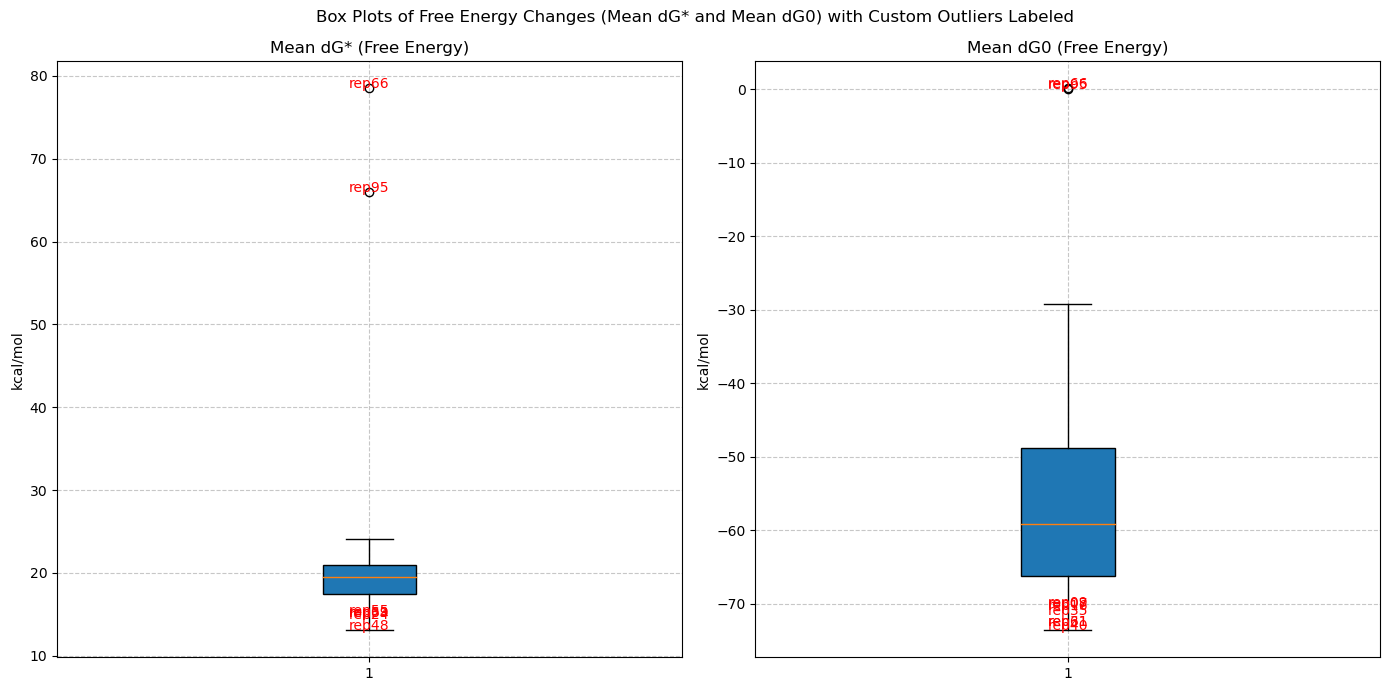

Filtered data saved to: /home/hp/results/mousecys/WT/filtered_single_values_no_missing_or_outliers.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV
filename = "/home/hp/results/mousecys/WT/single_values.csv"
df = pd.read_csv(filename)

# Drop rows with NaN values in specific columns ('Mean dG*' and 'Mean dG0')
df_cleaned = df.dropna(subset=['Mean dG*', 'Mean dG0'], how='any')

# Function to detect outliers in a series with a specified lower threshold
def find_outliers(series, lower_threshold=None):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # If a lower threshold is provided, use that for outlier detection
    if lower_threshold is not None:
        return series[(series < lower_bound) | (series < lower_threshold) | (series > upper_bound)]
    else:
        return series[(series < lower_bound) | (series > upper_bound)]

# Define custom lower thresholds
custom_lower_threshold_dg_star = 15
custom_lower_threshold_dg0 = -70

# Identify outliers for 'Mean dG*' and 'Mean dG0'
dg_star_outliers = find_outliers(df_cleaned['Mean dG*'], lower_threshold=custom_lower_threshold_dg_star)
dg0_outliers = find_outliers(df_cleaned['Mean dG0'], lower_threshold=custom_lower_threshold_dg0)

# Plot box plots for Mean dG* and Mean dG0
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for Mean dG* with outliers labeled
axes[0].boxplot(df_cleaned['Mean dG*'].dropna(), vert=True, patch_artist=True)
axes[0].set_title('Mean dG* (Free Energy)')
axes[0].set_ylabel('kcal/mol')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Label outliers for Mean dG*
for value in dg_star_outliers:
    axes[0].text(1, value, df_cleaned.loc[df_cleaned['Mean dG*'] == value, 'Replica'].values[0], ha='center', color='red')

# Plot for Mean dG0 with outliers labeled
axes[1].boxplot(df_cleaned['Mean dG0'].dropna(), vert=True, patch_artist=True)
axes[1].set_title('Mean dG0 (Free Energy)')
axes[1].set_ylabel('kcal/mol')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Label outliers for Mean dG0
for value in dg0_outliers:
    axes[1].text(1, value, df_cleaned.loc[df_cleaned['Mean dG0'] == value, 'Replica'].values[0], ha='center', color='red')

plt.suptitle("Box Plots of Free Energy Changes (Mean dG* and Mean dG0) with Custom Outliers Labeled")
plt.tight_layout()
plt.show()

# Remove outliers from the dataframe
filtered_df = df_cleaned[~df_cleaned['Mean dG*'].isin(dg_star_outliers) & ~df_cleaned['Mean dG0'].isin(dg0_outliers)]

# Save the cleaned and filtered data to a new file
filtered_filename_final = "/home/hp/results/mousecys/WT/filtered_single_values_no_missing_or_outliers.csv"
filtered_df.to_csv(filtered_filename_final, index=False)

print(f"Filtered data saved to: {filtered_filename_final}")
